### Visualizing the frequency of SE related words 
In this notebook, I go through steps to reproduce the bar chart of the most frequent side effects
1. Read the side effect frequency counts (stemmed key words: counts)
2. undo the stemming of the key words by reading from dictionary of keywords: stemmed keywords
3. Plot the most frequent keywords that are not included in common - meaninglesss words --> perhaps can use something like TF-IDF to weigh in the importance of the score?
Overall, this is very very involved process

#### 1. Read the side effect frequency counts (stemmed key words: counts)

In [1]:
import pickle 
import os 
import sys
import pandas as pd 
import re 
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.analys import * 

ModuleNotFoundError: No module named 'analys'

In [ ]:
cwd = Path.cwd()
external_data_fd = '../data/external'
processed_data_fd = '../data/processed'
newpath_1 = r'{}//side_effect_without_stem'.format((cwd/ processed_data_fd).resolve())

In [10]:
# 1a. Load the dictionary of {SE}: Frequency counted 
f_n =[ 'Effexor_SE_freq.pkl',  'Lexapro_SE_freq.pkl',  'Prozac_SE_freq.pkl',  'Wellbutrin_SE_freq.pkl', 'Zoloft_SE_freq.pkl']
drug_name = [r.split('_')[0] for r in f_n]
print (drug_name)

['Effexor', 'Lexapro', 'Prozac', 'Wellbutrin', 'Zoloft']


In [43]:
# Open dictionary of original word: stemmed version 
fnm = newpath_1 +"/stem_dictionary.pickle"
with open(fnm, 'rb') as handle:
    stemm_dictionary = pickle.load(handle)

In [44]:
def undostem(word,dict_stem=stemm_dictionary):
    # look up word in dict_stem's values 
    for SE, stemmed in dict_stem.items():    
        if word in stemmed:
            return SE

#### 2. undo the stemming of the key words by reading from dictionary of keywords: stemmed keywords


Example EDA for visualization (for Effexor)

In [1]:
# load the picke file where frequency of side effect is saved
i=0
d_name = drug_name[0]
fnm = newpath_1 +"/"+ f_n[i]
dict_a= pickle.load(open(fnm, 'rb'))

for d in drug_name:
    dict_a = {k:v for (k,v) in dict_a.items() if not re.compile(d, re.IGNORECASE).match(k)}
s = pd.Series(dict_a, name='count')
s.index.name = 'SE'
s= s.reset_index()
s =s.sort_values('count', ascending=False)

NameError: name 'drug_name' is not defined

In [ ]:
s['Percentage'] = (s['count'].values/s['count'].sum())*100
print(s['Percentage'].cumsum())
print (s.head())
s['Percentage'].plot.hist

In [ ]:
# Heavly skewed distribution

In [ ]:
s['count'].plot.box()
s['count'].describe()
s[s['count']> 194]['count'].sum()/s['count'].sum()

In [ ]:
# getting count > 194 (3rd quartile) captures 67% of counts --> Let's go for it! 

In [46]:
s['SE_unstem']= s['SE'].apply(undostem)

3


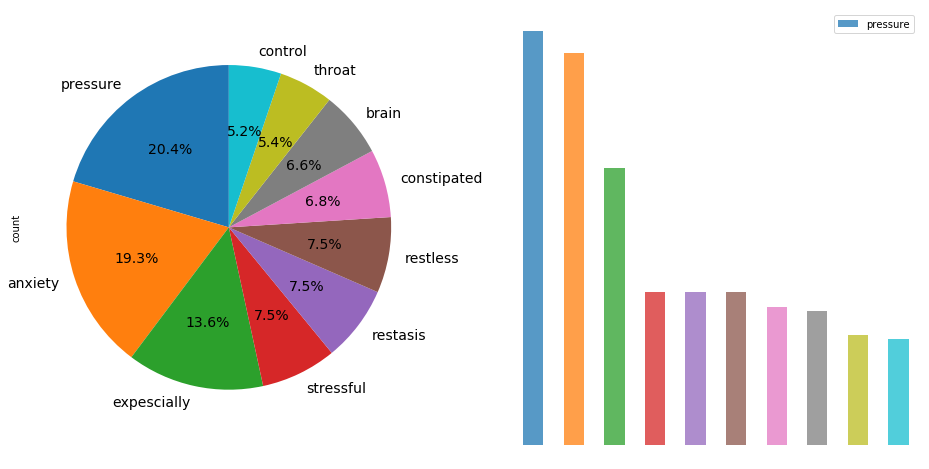

In [47]:
s_set= s[s['count']> 194]
print(len(s_set))
plt.figure(figsize=(16,8))
# plot pie chart
ax1 = plt.subplot(121, aspect='equal')
s.iloc[:10].plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%',startangle=90, shadow=False, labels=s['SE_unstem'].iloc[:10], legend = False, fontsize=14)

# # plot bar chart
ax2 = plt.subplot(122)
plt.axis('off')
s['count'][:10].plot.bar(alpha=0.75, rot=0)
ax2.legend(s['SE_unstem'])

#### 3. Plot the most frequent keywords that are not included in common - meaninglesss words 
I applied the above visualization to all five most prevalent anti depressants. In addtion, I've manually removed the most prevalent words that has little meaning - name of the drugs or nouns that are not informative. However, this is a manual process and certainly the one I'd like to improve upon using algorithmic approach

In [ ]:
# 1b. Create two charts: Bar & Pie chart

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mskang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Effexor


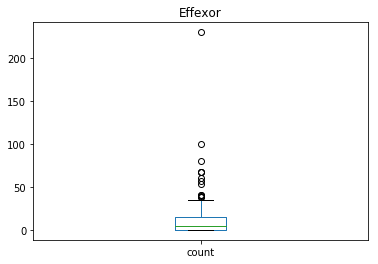

225


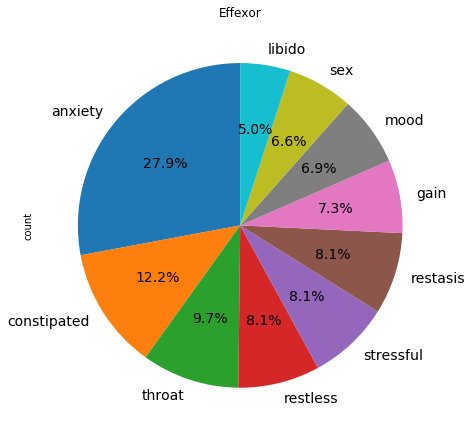

Lexapro


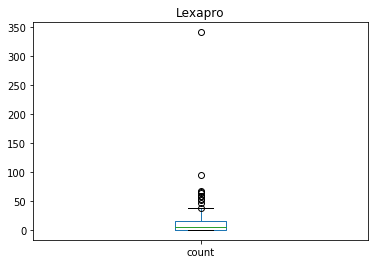

225


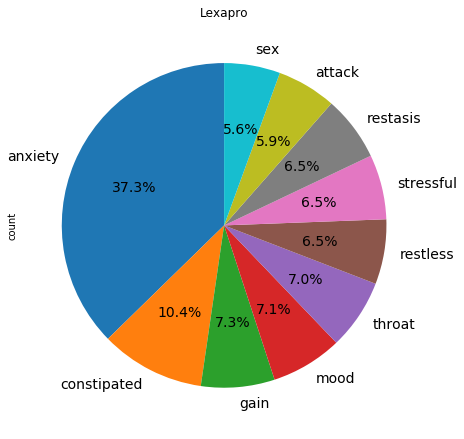

Prozac


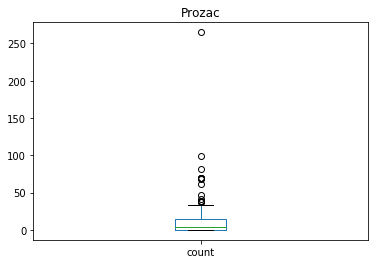

225


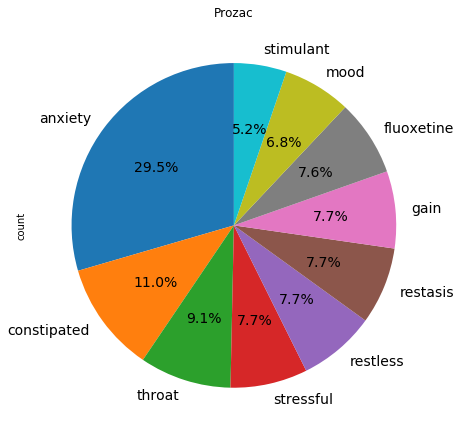

Wellbutrin


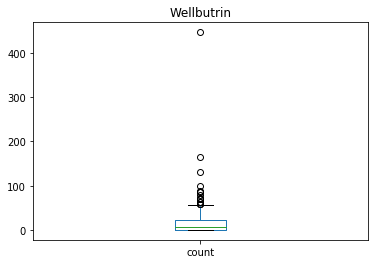

225


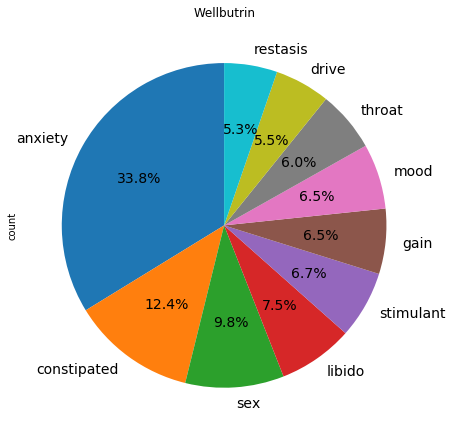

Zoloft


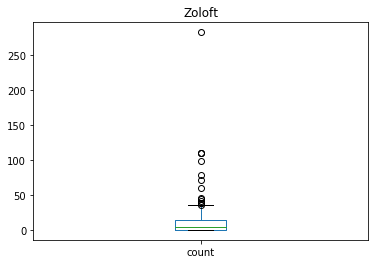

225


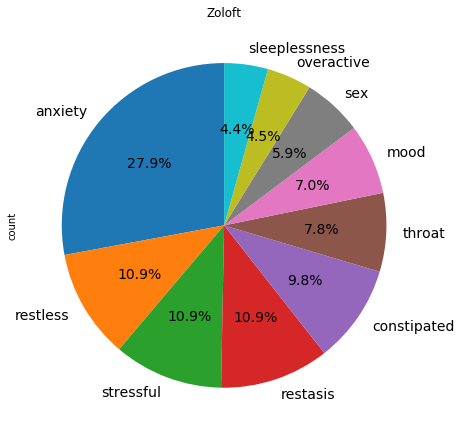

In [69]:
import nltk
nltk.download('averaged_perceptron_tagger')

for i in range(len(drug_name)):
    d_name = drug_name[i]
    fnm = newpath_1 +"/"+ f_n[i]
    dict_a= pickle.load(open(fnm, 'rb'))
    for d in drug_name:
        dict_a = {k:v for (k,v) in dict_a.items() if not re.compile(d, re.IGNORECASE).match(k)}

    s = pd.Series(dict_a, name='count')
    s.index.name = 'SE'
    s= s.reset_index()
    s['SE_unstem']= s['SE'].apply(undostem)
    s =s.sort_values('count', ascending=False)
    rem = ["effectively","forev","thank","thing","reaction","period","person","thought","feel","start","world","problem","earli","work","smoke","worri","stay","mg","beer","get","dosag","complet","properli","help","hell","time","day","life","night","week","doctor","dose","symptom","way","lot","ssri","drug","difficulty","increa","month","difficulti","year","nightly","helped","working","timing","expecially","drugged","started","None","complete","expescially","complete","bit","yearly","monthly","pressure","discoloration", "brain","cymbalta","remeron","paxil","control","celexa","personality","slowly","term","horribly","improves","ask","easily"]
    s= s.dropna()
    s= s[~s['SE_unstem'].isin(rem)]
    s =s.sort_values('count', ascending=False)
    s['Percentage'] = (s['count'].values/s['count'].sum())*100

    print (d_name)
    s['count'].plot.box(title=d_name)
    plt.show()

    plt.figure(figsize=(16,8))
    # plot chart
    ax1 = plt.subplot(121, aspect='equal')
    s.iloc[:10].plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%',startangle=90, shadow=False, labels=s['SE_unstem'].iloc[:10], legend = False, fontsize=14,title= d_name)
    plt.show()
    
    ax2 = plt.subplot(122)
    plt.axis('off')
    s['count'][:10].plot.bar(alpha=0.75, rot=0)
    ax2.legend(s['SE_unstem'])